In [101]:
# first and formost improt all the necessary files here 
import pandas as pd 
import numpy as np
import requests
import json
from bs4 import BeautifulSoup

from urllib.parse import unquote, quote
from datetime import datetime


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [102]:
# we need to get the CSV file 
df=pd.read_csv("worldometer_data.csv")

In [103]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


# Reciepe one: How to select bases on cetrain condition from a dataset 

In [104]:
#if we would like to filter the dataset for instance file countries with more that ten thousand death we can use the code below
tenThosand_death=df[df["TotalDeaths"]>10000]

In [105]:
tenThosand_death

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
10,Iran,Asia,8.409762e+07,320117,NaN,17976.0,NaN,277463.0,NaN,24678.0,4156.0,3806.0,214.0,2612763.0,31068.0,EasternMediterranean
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe


In [106]:
y=tenThosand_death[tenThosand_death["TotalTests"]>1000000] #gives us total test of dataset with lot of testing

In [107]:
#we can also caluclate the percentage of countries who have more than one million covid-19 testing 

In [108]:
y

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
10,Iran,Asia,8.409762e+07,320117,NaN,17976.0,NaN,277463.0,NaN,24678.0,4156.0,3806.0,214.0,2612763.0,31068.0,EasternMediterranean
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe


In [109]:
#calculating percetage of countries who have morethan ten thousand death dataset
y.shape[0]/df.shape[0]*100    #.shape gives the number of rows

5.741626794258373

In [110]:
# in which 5% people countries have had 10 000  people die 

# Reciepe two: writing a function and then applying it to a dataset 

In [111]:
## we can create a new column thats says active cases per million using a function then apply that funtion to a new column

In [112]:
# write the function 
def changetopercentage(number):
    value=number*100
    return value



In [113]:
#we can caluclate the mortality rate for each country and use the function above to apply the function and change it to percentage
df["mortality_rate"]=(df["TotalDeaths"]/df["TotalCases"]).apply(changetopercentage)

In [114]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,mortality_rate
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,3.235259
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,3.381042
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,2.055782
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,1.675204
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,1.784520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN,7.692308
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe,NaN


### As we can see above we have  a new column that has motality rate as a column, we can mortality rate for each and every country

In [115]:
df = df.sort_values('mortality_rate', ascending=False)


In [116]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,mortality_rate
131,Yemen,Asia,29886897.0,1768,NaN,508.0,NaN,898.0,NaN,362.0,NaN,59.0,17.0,120.0,4.0,EasternMediterranean,28.733032
19,France,Europe,65288306.0,195633,NaN,30312.0,NaN,82460.0,NaN,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe,15.494318
11,UK,Europe,67922029.0,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe,15.062603
15,Italy,Europe,60452568.0,249204,NaN,35187.0,NaN,201323.0,NaN,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe,14.119757
35,Belgium,Europe,11594739.0,71158,NaN,9859.0,NaN,17661.0,NaN,43638.0,61.0,6137.0,850.0,1767120.0,152407.0,Europe,13.855083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,53237.0,17,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas,NaN
203,Greenland,North America,56780.0,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN,NaN


## From the above order we can see that yemen had mortality rate of 28% which is very high, I believe that's because yemen is in a middle of civil war right now and as a result has poor inftrastructure

In [117]:
average_score = df['mortality_rate'].mean()
average_score


3.2654635611164577

### Above we calculated that the average mortality rate is 3.26546%, we can use .mean() to find the mean for column

# Receipe Three: Matplotlib visualizations 

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

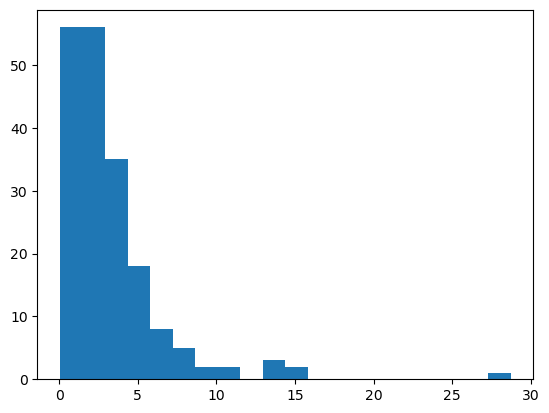

In [119]:
# Method one to make histogram matplotlib
# To make a histogram for the mortality rate we can use plot to plot it 
plt.hist(df["mortality_rate"], bins=20)
plt.show()

<AxesSubplot:xlabel='mortality_rate', ylabel='Count'>

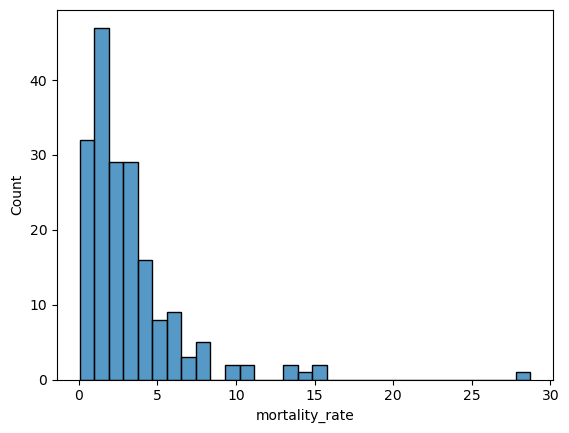

In [125]:
#Method two to make the same histrogram using sea born
sns.histplot(df['mortality_rate'])


## The one above shows us the distribution of mortality rate on the-x axis and the frequency on the y-axis 

In [120]:
columns_to_select=["Country/Region", "TotalCases", "TotalDeaths"]

In [121]:
df_new = df[columns_to_select]

In [122]:
df_new

,Country/Region,TotalCases,TotalDeaths
131,Yemen,1768,508.0
19,France,195633,30312.0
11,UK,308134,46413.0
15,Italy,249204,35187.0
35,Belgium,71158,9859.0
...,...,...,...
202,Saint Kitts and Nevis,17,NaN
203,Greenland,14,NaN
205,Caribbean Netherlands,13,NaN
206,Falkland Islands,13,NaN


In [123]:
df_new=df_new[df_new["TotalDeaths"]>10000]

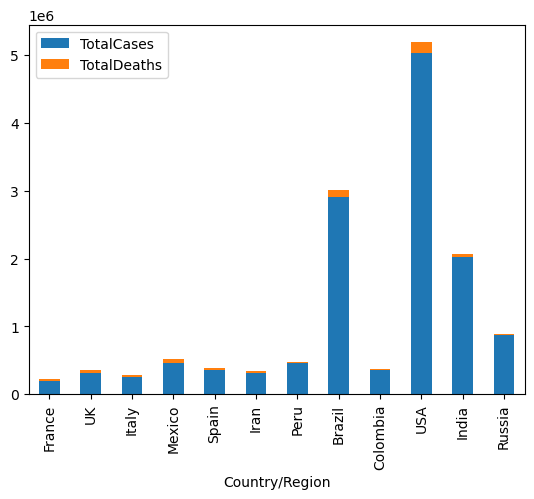

In [124]:
graph= df_new.plot(kind='bar', stacked=True, x="Country/Region")


In [251]:
# In the above graph we used .plot the kind bar and made a stacked bar gaph that shows the total cases and also the total death that happened because of covid-19

## The graph shows that there are fewer deaths for people who had covid as we see the orange shaded area is the area that show death part 

## Scatterplot to show if there's a relationship between two column in this case population and also total cases 


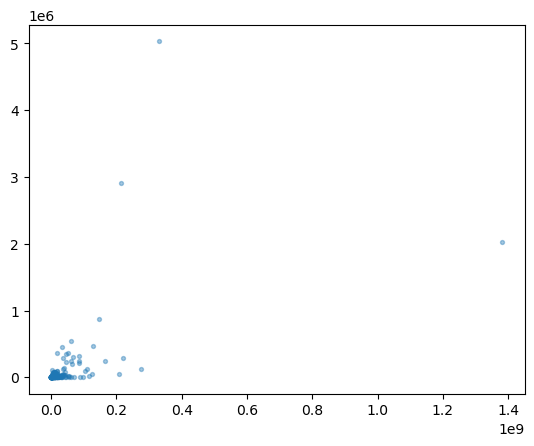

In [29]:
plt.scatter(df["Population"], df["TotalCases"], s=8, alpha=0.4)


##  Reciepe Four: Using APIs to scrapedata set and 

In [30]:
from io import BytesIO

import requests

import json

from bs4 import BeautifulSoup

from urllib.parse import unquote, quote

In [31]:
url = 'https://api.covid19api.com/total/country/united-states'

In [32]:
# Make a GET request to the API endpoint

response= requests.get(url)

In [33]:
# Get the response in json format 
print(response)
countries = response.json()


<Response [200]>


In [34]:
print(countries)

[{'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-01-22T00:00:00Z', 'Comment': 'no reliable source to provide recovered data'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-01-23T00:00:00Z', 'Comment': 'no reliable source to provide recovered data'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 2, 'Deaths': 0, 'Recovered': 0, 'Active': 2, 'Date': '2020-01-24T00:00:00Z', 'Comment': 'no reliable source to provide recovered data'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Confirmed': 2, 'Deaths': 0, 'Recovered':

## we can also play around another APis and extract usable data from it

In [35]:
#An API for crypto currency
url_one= 'https://api.n.exchange/en/api/v1/currency/'

In [36]:
response_one=requests.get(url_one)
print(response_one)

<Response [200]>


In [37]:
getcrypto=response_one.json()
print(getcrypto)


[{'code': 'IDR', 'name': 'IDR', 'min_confirmations': None, 'is_crypto': False, 'minimal_amount': '0.01000000', 'maximal_amount': '1.00000000', 'is_base_of_enabled_pair': False, 'is_quote_of_enabled_pair': False, 'has_enabled_pairs': False, 'is_base_of_enabled_pair_for_test': False, 'is_quote_of_enabled_pair_for_test': False, 'has_enabled_pairs_for_test': False, 'withdrawal_fee': '0.00000000', 'extra_id': None, 'network': None}, {'code': 'TRY', 'name': 'TRY', 'min_confirmations': None, 'is_crypto': False, 'minimal_amount': '0.01000000', 'maximal_amount': '1.00000000', 'is_base_of_enabled_pair': False, 'is_quote_of_enabled_pair': False, 'has_enabled_pairs': False, 'is_base_of_enabled_pair_for_test': False, 'is_quote_of_enabled_pair_for_test': False, 'has_enabled_pairs_for_test': False, 'withdrawal_fee': '0.00000000', 'extra_id': None, 'network': None}, {'code': 'MXN', 'name': 'MXN', 'min_confirmations': None, 'is_crypto': False, 'minimal_amount': '0.01000000', 'maximal_amount': '1.000000

In [38]:
counter=0
for item in getcrypto:
    name=item['name']
    counter=counter+1
    print(name)
#This enbales us to see list of crypto currecy that we have. 

IDR
TRY
MXN
MYR
PHP
THB
BGN
CZK
ZAR
TrueUSD
Gala
NEAR Protocol
Cosmos
Ethereum Classic
USDC TRON
dYdX
Tether AVAX
yearn.finance
PancakeSwap
1inch Network
Binance USD
The Graph
ApeCoin
Tether BSC
Illuvium
Tezos
Convex Finance
MOBOX Token
SEK
USDC Polygon
DKK
Audius
FTX Token
HUF
NZD
BRL
Raydium
ILS
INR
Wrapped Ethereum (Solana)
NOK
Uniswap
Polygon Native
NEM
Wrapped Bitcoin
Quant
Tether MATIC
ADA (BSC)
USD
AUD
CAD
KRW
RUB
Lido DAO
Maker
Immutable X
renos
Enjin Coin
RON
PLN
Render Token
BitDegree
JPY
HRK
Wrapped LINK (Solana)
CHF
Elrond
Golem
tether
GBP
EUR
neo
Waves
Nexo
Serum
EOS
USD COIN (BSC)
Shiba Inu
USDC ALGO
Tether
PAX Gold
Binance USD BSC
Ethereum Name Service
Aave
Qtum
Bibox Token
Synthetix
BlockMesh
Cobinhood
COSS
0x
Wrapped USDC (Solana)
Basic Attention Token
Loopring
USDC AVAX
Chiliz
KuCoin Shares
Binance Coin ERC20
Arbitrum
Bitcoin SV
Ankr
Compound
STEPN
Decentraland
Polygon
Amp
Curve DAO Token
KyberNetwork
nano
verge
Huobi Token
Axie Infinity Shard
litecoin
The Sandbox
Ban

## Like the above examples we can use APIs similar to CSV files to extract data 
## One note about APIs is that its hard to find a work API, many API on the internet doesn't function well



## Reciepe five : Website Scraping 

In [87]:
#we are requesting the attributes of the website NBA using request
all_star_url='https://www.nba.com/'
all_star_res=requests.get(all_star_url)
soup=BeautifulSoup(all_star_res.content, 'html.parser')
soup
#we don't need a soup since the response is in Json format if it was html we could have turned it into soup 

<!DOCTYPE html>
<html data-build="6860" data-version="3.6.0" lang="en"><head><meta charset="utf-8"/><link href="/site-manifest.json" rel="manifest"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/><script src="/newrelic/newrelic-prod.js"></script><script id="theme-loader" src="/theme-loader.js"></script><title>The official site of the NBA for the latest NBA Scores, Stats &amp; News. | NBA.com</title><meta content="The official site of the National Basketball Association. Follow the action on NBA scores, schedules, stats, news, Team and Player news." name="description"/><link href="/favicon.ico" rel="icon"/><link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/apple-touch-icon.png" rel="apple-touch-icon"/><link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/apple-touch-icon.png

In [95]:
# Here we are going to look for links from the website and print all the links 
links_text=soup.find_all('nav',{'class':'NavBar_nav__U9xyc'})
for l in links_text:
    print(l)


<nav class="NavBar_nav__U9xyc"><button class="NavHamburger_hamburger__kqDDP NavHamburger_squeeze__F9qaj" data-content="menu-hamburger" data-id="nba:navigation:menu-hamburger:icon" data-is-open="false" data-track="click" data-type="icon" title="Global Navigation Toggle" type="button"><span class="NavHamburger_box__r0p_S"><span class="NavHamburger_inner__whZdg"><span class="NavHamburger_navToggle__nOZPv">Navigation Toggle</span></span></span></button><a class="Anchor_anchor__cSc3P NavLogo_nl__b4Mct" data-content="home" data-has-children="true" data-has-more="false" data-id="nba:navigation:home:logo" data-is-external="false" data-track="click" data-type="logo" href="/" title="NBA Logo Homepage Button"><img alt="NBA Logo" src="https://cdn.nba.com/logos/leagues/logo-nba.svg" title="NBA Logo"/><span class="sr-only">NBA</span></a><ul class="NavBar_menu__yO4Am" data-is-open="false" id="nav-ul"><li aria-expanded="false" aria-haspopup="true" class="NavItem_item__Gokj_" data-dropdown="true" data-

None
